<a href="https://colab.research.google.com/github/csaikrupa/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**

This script begins by installing the necessary libraries, including the Snowflake Connector, and importing essential Python libraries such as Pandas, NumPy, Seaborn, and Matplotlib. The Seaborn style is set to "whitegrid" for aesthetic consistency in the visualizations. The main objective is to connect to the Snowflake database, retrieve data, and conduct exploratory data analysis, including visualization.



About Dataset:

The dataset is represented as a Pandas DataFrame with 1236 entries and 7 columns. Each entry corresponds to a specific case, identified by an integer index ranging from 1 to 1236. The dataset includes the following columns:

BWT (Birth Weight):

Data Type: int16
All 1236 entries have non-null integer values representing birth weights.
GESTATION:

Data Type: object
All 1236 entries have non-null values, but the data type is currently assigned as an object. Consider converting it to a numerical type if it represents a numeric value.
PARITY:

Data Type: int8
All 1236 entries have non-null integer values representing parity.
AGE:

Data Type: object
All 1236 entries have non-null values, but the data type is currently assigned as an object. Consider converting it to a numerical type if it represents ages.
HEIGHT:

Data Type: object
All 1236 entries have non-null values, but the data type is currently assigned as an object. Consider converting it to a numerical type if it represents heights.
WEIGHT:

Data Type: object
All 1236 entries have non-null values, but the data type is currently assigned as an object. Consider converting it to a numerical type if it represents weights.
SMOKE:

Data Type: object
All 1236 entries have non-null values, but the data type is currently assigned as an object. Consider converting it to a numerical type if it represents smoking status.

**Importing Libraries**

In [78]:
!pip install "snowflake-connector-python[pandas]"

In [79]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import snowflake.connector

sns.set(style="whitegrid")  # Set the style of the plot


**Funnctions**

In [80]:
def convert_column_to_numeric(df, column_name):
    # Check if the column exists in the DataFrame
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")

    # Convert the specified column to numeric
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

    return df

def plot_bar_graph(data, x_column, y_column, title=None, xlabel=None, ylabel=None):

    # Create a bar plot using Seaborn
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    sns.barplot(x=x_column, y=y_column, data=data)

    # Set plot labels and title
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if title:
        plt.title(title)

    plt.xticks(rotation = 25)
    # Show the plot
    plt.show()



**Explanation:**


The provided code defines two utility functions for data analysis. The first function, convert_column_to_numeric, takes a DataFrame (df) and a column name (column_name) as parameters. It checks if the specified column exists in the DataFrame, and if so, it converts the values in that column to numeric using the Pandas pd.to_numeric function with error handling for coercion. The function then returns the modified DataFrame. The second function, plot_bar_graph, is designed for creating bar graphs using Seaborn. It takes parameters such as the data (data), x-axis column (x_column), y-axis column (y_column), and optional title, xlabel, and ylabel. It generates a bar plot, adjusts the figure size, sets labels and title, and displays the plot using Matplotlib and Seaborn. These functions provide convenient tools for converting columns to numeric type and visualizing data through bar plots.

**Conncet to Snowflake**

In [81]:
# # Connect to Snowflake
con = snowflake.connector.connect(
     user='krupa',
     password='Fall@2023usa',
     account='wo72630.us-central1.gcp',
     database='MYDATA',
     schema='PUBLIC',
     warehouse='COMPUTE_WH',
     session_parameters={
         'QUERY_TAG': 'Demo User Interaction',
     }
 )

# Execute an SQL query using a cursor on the database connection
dd_df1 = con.cursor().execute('''  select * from IDENTIFIER('"MYDATA"."PUBLIC"."FINAL_DATA"');''').fetch_pandas_all()

In [82]:
# Set the index of DataFrame dd_df1 to the 'CASE' column
dd_df1 = dd_df1.set_index("CASE")

In [83]:
#summary of the DataFrame dd_df1
dd_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236 entries, 1 to 1236
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BWT        1236 non-null   int16 
 1   GESTATION  1236 non-null   object
 2   PARITY     1236 non-null   int8  
 3   AGE        1236 non-null   object
 4   HEIGHT     1236 non-null   object
 5   WEIGHT     1236 non-null   object
 6   SMOKE      1236 non-null   object
dtypes: int16(1), int8(1), object(5)
memory usage: 61.6+ KB


In [84]:
# Convert the 'AGE' column in DataFrame dd_df1 to numeric type using the convert_column_to_numeric function
dd_df1 = convert_column_to_numeric(dd_df1,"AGE")

**Explanation**

The code snippet utilizes the custom function convert_column_to_numeric to convert the 'AGE' column in the DataFrame dd_df1 to a numeric data type. This conversion is essential for ensuring that the 'AGE' values are treated as numerical rather than object data, facilitating numerical analysis and visualizations.

In [85]:
# Convert the 'HEIGHT' column in DataFrame dd_df1 to numeric type using the convert_column_to_numeric function
dd_df1 = convert_column_to_numeric(dd_df1, "HEIGHT")


**Explanation**

This code line gives the custom function convert_column_to_numeric to transform the 'HEIGHT' column in the DataFrame dd_df1 to a numeric data type. By converting this column to numeric, the script ensures that 'HEIGHT' values are treated as numerical rather than object data, facilitating appropriate numerical operations and visualizations.

In [86]:
# Convert the 'WEIGHT' column in DataFrame dd_df1 to numeric type using the convert_column_to_numeric function
dd_df1 = convert_column_to_numeric(dd_df1, "WEIGHT")


**Explanation:**

This line of code utilizes the custom function convert_column_to_numeric to convert the 'WEIGHT' column in the DataFrame dd_df1 to a numeric data type. The conversion is crucial for ensuring that 'WEIGHT' values are treated as numerical rather than object data, enabling proper numerical analysis and visualizations.

In [87]:
# Convert the 'SMOKE' column in DataFrame dd_df1 to numeric type using the convert_column_to_numeric function
dd_df1 = convert_column_to_numeric(dd_df1, "SMOKE")


**Explanation:**

This line of code employs the custom function convert_column_to_numeric to transform the 'SMOKE' column in the DataFrame dd_df1 to a numeric data type. The conversion is essential for ensuring that 'SMOKE' values are treated as numerical rather than object data, facilitating appropriate numerical operations and visualizations.

In [88]:
dd_df1 = convert_column_to_numeric(dd_df1,"SMOKE")

In [89]:
# Convert the 'GESTATION' column in DataFrame dd_df1 to numeric type using the convert_column_to_numeric function
dd_df1 = convert_column_to_numeric(dd_df1, "GESTATION")


**Explanation:**

This code line uses the custom function convert_column_to_numeric to convert the 'GESTATION' column in the DataFrame dd_df1 to a numeric data type. The conversion is crucial for ensuring that 'GESTATION' values are treated as numerical rather than object data, enabling proper numerical analysis and visualizations.

In [90]:
# Display the DataFrame dd_df1
display(dd_df1)

,BWT,GESTATION,PARITY,AGE,HEIGHT,WEIGHT,SMOKE
CASE,,,,,,,
1,120,284.0,0,27.0,62.0,100.0,0.0
2,113,282.0,0,33.0,64.0,135.0,0.0
3,128,279.0,0,28.0,64.0,115.0,1.0
4,123,NaN,0,36.0,69.0,190.0,0.0
5,108,282.0,0,23.0,67.0,125.0,1.0
...,...,...,...,...,...,...,...
1232,113,275.0,1,27.0,60.0,100.0,0.0
1233,128,265.0,0,24.0,67.0,120.0,0.0
1234,130,291.0,0,30.0,65.0,150.0,1.0


In [91]:
# Display concise information about the DataFrame dd_df1 using the info() method
dd_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236 entries, 1 to 1236
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BWT        1236 non-null   int16  
 1   GESTATION  1223 non-null   float64
 2   PARITY     1236 non-null   int8   
 3   AGE        1234 non-null   float64
 4   HEIGHT     1214 non-null   float64
 5   WEIGHT     1200 non-null   float64
 6   SMOKE      1226 non-null   float64
dtypes: float64(5), int16(1), int8(1)
memory usage: 61.6 KB


**Graph: Non-Null Value Counts Across Columns in dd_df1**

<Axes: >

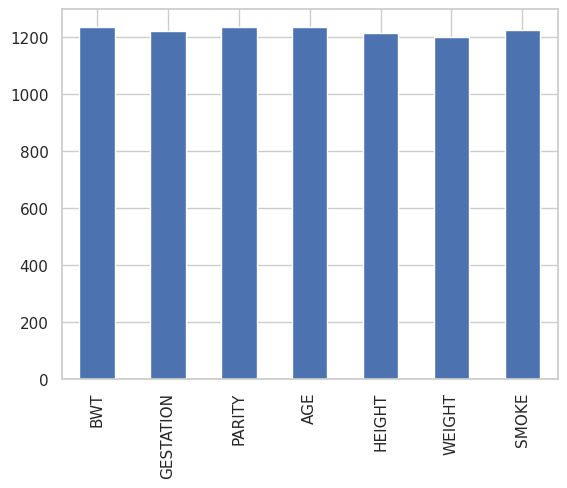

In [92]:
dd_df1.describe().loc["count",:].plot(kind = "bar")

**Explanation:**

The code generates a bar plot illustrating the count of non-null values for each column in the DataFrame dd_df1. Utilizing the describe() method, the code extracts the row corresponding to the count of non-null values, and a bar plot is created to visually represent the completeness of data in various columns. This analysis offers a rapid assessment of data quality and identifies columns with potential missing or incomplete information.


**Conclusion:**

The bar plot provides a snapshot of data completeness in dd_df1, facilitating a quick identification of columns with varying counts of non-null values. Ideally, a uniform and high count across all columns is desired for robust analyses. Deviations from this pattern may indicate areas requiring further investigation or data handling. This visualization serves as an initial step in assessing data integrity and guides subsequent steps in data cleaning and preparation for analysis.

**Graph: Age vs Smoke**

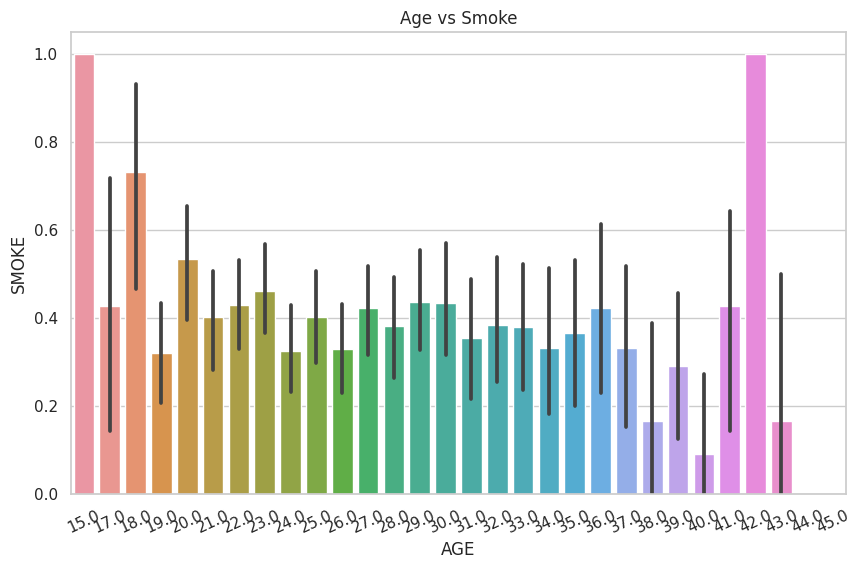

In [93]:
plot_bar_graph(dd_df1, "AGE", "SMOKE", title="Age vs Smoke")

**Explanation:**

The given code utilizes a custom function, plot_bar_graph, to create a bar plot comparing the 'AGE' and 'SMOKE' columns in the DataFrame dd_df1. The function takes parameters such as the data (dd_df1), x-axis column (AGE), y-axis column (SMOKE), and optional title ("Age vs Smoke"). The resulting bar plot visually depicts the distribution or relationship between age and smoking status in the dataset.

**Conclusion:**

The bar plot titled "Age vs Smoke" effectively communicates the distribution of smoking status across different age groups in the dataset. This visualization serves as a valuable tool for exploring potential associations between age and smoking habits. Interpretation of the plot may reveal insights into whether certain age groups exhibit higher or lower prevalence of smoking. Such visualizations contribute to a better understanding of the dataset and inform subsequent analyses exploring the relationship between demographic factors and health behaviors.







In [94]:
# Displaying descriptive statistics for numerical columns in DataFrame dd_df1
dd_df1.describe()

,BWT,GESTATION,PARITY,AGE,HEIGHT,WEIGHT,SMOKE
count,1236.000000,1223.000000,1236.000000,1234.000000,1214.000000,1200.000000,1226.000000
mean,119.576861,279.338512,0.254854,27.255267,64.047776,128.625833,0.394780
std,18.236452,16.027693,0.435956,5.781405,2.533409,20.971862,0.489003
min,55.000000,148.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,108.750000,272.000000,0.000000,23.000000,62.000000,114.750000,0.000000
50%,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,131.000000,288.000000,1.000000,31.000000,66.000000,139.000000,1.000000
max,176.000000,353.000000,1.000000,45.000000,72.000000,250.000000,1.000000


The provided code utilizes the describe() method to generate descriptive statistics for the numerical columns in the DataFrame dd_df1.

## **DATA 2: JSON**

In [95]:
# Reading a JSON file into a Pandas DataFrame named 'json'
json = pd.read_json(r"/content/Pregnancy-Associated_Mortality.json")

In [96]:
# Displaying the DataFrame 'json'
json

,Year,Related,Underlying_cause,Race/ethnicity,Borough,Deaths
0,2016,All,All,All,Bronx,5
1,2016,All,All,All,Brooklyn,12
2,2016,All,All,All,Manhattan,4
3,2016,All,All,All,Queens,8
4,2016,All,All,All,Staten Island,4
...,...,...,...,...,...,...
193,2020,Unable to Determine,Homicide,All,All,2
194,2020,Unable to Determine,Mental Health Conditions (Overdose related to ...,All,All,2
195,2020,Unable to Determine,Mental Health Conditions (Suicide),All,All,1
196,2020,Unable to Determine,Unintentional Injury,All,All,1


In [97]:
# Displaying concise information about the DataFrame 'json' using the info() method
json.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              198 non-null    int64 
 1   Related           198 non-null    object
 2   Underlying_cause  198 non-null    object
 3   Race/ethnicity    198 non-null    object
 4   Borough           198 non-null    object
 5   Deaths            198 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 9.4+ KB


In [98]:
# Convert the 'Year' column in DataFrame 'json' to numeric type using the convert_column_to_numeric function
json = convert_column_to_numeric(json, "Year")


**Explanation:**

This code line applies the custom function convert_column_to_numeric to transform the 'Year' column in the DataFrame 'json' to a numeric data type. The conversion is crucial for treating 'Year' values as numerical rather than object data, enabling appropriate numerical operations and visualizations.

In [99]:
# Displaying descriptive statistics for numerical columns in DataFrame 'json'
json.describe()


,Year,Deaths
count,198.000000,198.00000
mean,2018.055556,4.80303
std,1.371184,4.72133
min,2016.000000,0.00000
25%,2017.000000,1.00000
50%,2018.000000,3.00000
75%,2019.000000,6.00000
max,2020.000000,26.00000


**Explanation:**

The code employs the describe() method to generate descriptive statistics for the numerical columns in the DataFrame 'json'. This includes metrics such as count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum. The summary statistics offer insights into the central tendency and variability of the numeric data.

In [100]:
# Counting occurrences of each unique value in the 'Year' column of DataFrame 'json'
json["Year"].value_counts()


2019    44
2017    43
2018    40
2020    38
2016    33
Name: Year, dtype: int64

**Explanation**:

This code line uses the value_counts() method to count the occurrences of each unique value in the 'Year' column of the DataFrame 'json'. The resulting output provides a distribution of the years present in the dataset and the corresponding frequency of each year.

**Graph: Year-wise Distribution of Data**

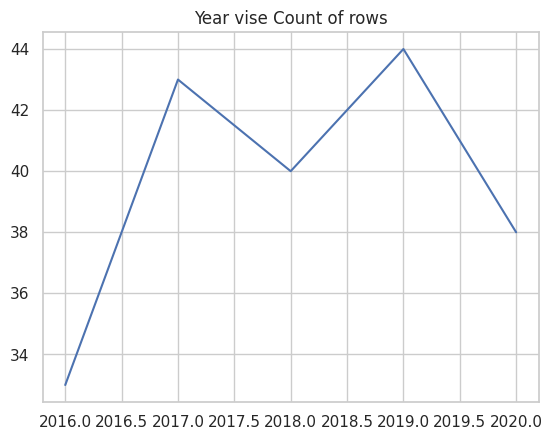

In [101]:
json["Year"].value_counts().sort_index().plot()
plt.title("Year vise Count of rows")
plt.show()

**Explanation:**

The provided code generates a line plot to visualize the count of rows corresponding to each unique year in the 'Year' column of the DataFrame 'json'. The value_counts() method calculates the frequency of each unique year, and sort_index() arranges the counts based on the ascending order of the years. The resulting line plot depicts the distribution of data across different years.


**Conclusion:**

The line plot titled "Year-wise Distribution of Data" provides a visual representation of how the dataset in 'json' is distributed across different years. By examining the plot, one can identify trends, variations, or any irregularities in the data over time. This visualization is particularly useful for understanding the temporal dynamics of the dataset and may reveal patterns that could influence subsequent analyses or investigations into the dataset's historical context.







**Graph: Year-wise Distribution of Deaths**

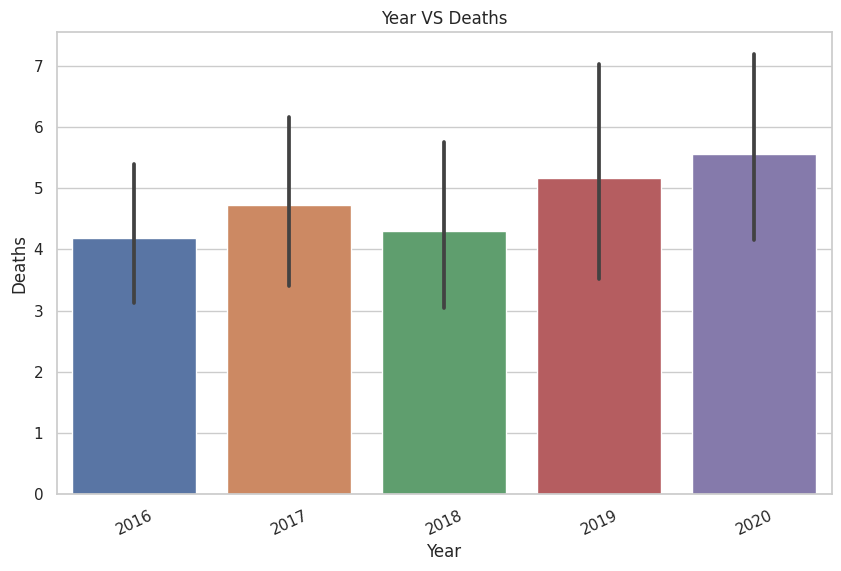

In [102]:
plot_bar_graph(json,"Year","Deaths",title="Year VS Deaths")

**Explanation:**

The given code utilizes the custom function plot_bar_graph to create a bar plot comparing the distribution of 'Deaths' across different years in the DataFrame 'json'. The function takes parameters such as the data (json), x-axis column (Year), y-axis column (Deaths), and an optional title ("Year VS Deaths"). The resulting bar plot visually represents the frequency of deaths recorded in each year.



**Conclusion:**

The bar plot titled "Year-wise Distribution of Deaths" offers a clear visual representation of the distribution of deaths across different years in the 'json' dataset. This visualization facilitates a quick understanding of the temporal patterns and variations in mortality data. Analyzing such trends is crucial for identifying potential patterns, spikes, or declines in mortality rates over time, aiding in the interpretation of public health data.







**Groupby Function**

In [103]:
# Grouping the DataFrame 'json' by the 'Underlying_cause' column and counting occurrences
json.groupby(["Underlying_cause"]).count()


,Year,Related,Race/ethnicity,Borough,Deaths
Underlying_cause,,,,,
All,100,100,100,100,100
Asthma/ pulmonary conditions,7,7,7,7,7
Cancer,7,7,7,7,7
Cardiovascular Conditions,12,12,12,12,12
Embolism,6,6,6,6,6
Hemorrhage,6,6,6,6,6
Homicide,8,8,8,8,8
Infection/Sepsis,10,10,10,10,10
Mental Health Conditions (Overdose related to substance use disorder),11,11,11,11,11


**Explanation:**

The provided code uses the groupby() method to group the DataFrame 'json' based on the unique values in the 'Underlying_cause' column. The count() function is then applied to each group, providing the number of occurrences of each unique underlying cause in the dataset.

**Pie Chart: Distribution of Deaths by Race/Ethnicity**

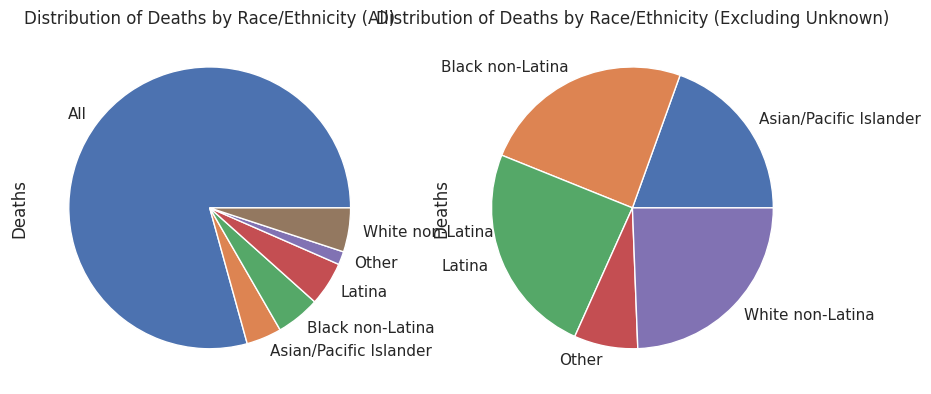

In [104]:
# Creating a subplot with two pie charts to visualize the distribution of 'Deaths' by 'Race/ethnicity' in the DataFrame 'json'
plt.figure(figsize=(10, 10))

# Subplot 1
plt.subplot(1, 2, 1)
json.groupby(["Race/ethnicity"]).count()["Deaths"].plot(kind="pie")
plt.title("Distribution of Deaths by Race/Ethnicity (All)")

# Subplot 2
plt.subplot(1, 2, 2)
json.groupby(["Race/ethnicity"]).count()["Deaths"][1:].plot(kind="pie")
plt.title("Distribution of Deaths by Race/Ethnicity (Excluding Unknown)")

plt.show()


**Explanation:**

The code creates a subplot with two pie charts to visualize the distribution of 'Deaths' by 'Race/ethnicity' in the DataFrame 'json'. Two subplots are generated: the first includes all race/ethnicity categories, and the second excludes the category labeled as 'Unknown'. Pie charts are used to illustrate the proportion of deaths attributed to each race/ethnicity group.


**Conclusion:**

The dual pie charts provide a visually compelling representation of the distribution of deaths across different race/ethnicity categories in the 'json' dataset. The first chart includes all available categories, while the second chart excludes the 'Unknown' category for a more focused analysis. These visualizations facilitate a quick understanding of the relative contributions of each race/ethnicity group to the overall mortality data, aiding in health disparities analysis and highlighting areas for further investigation.


**Pairplot: "Pairwise Relationships in dd_df1"**

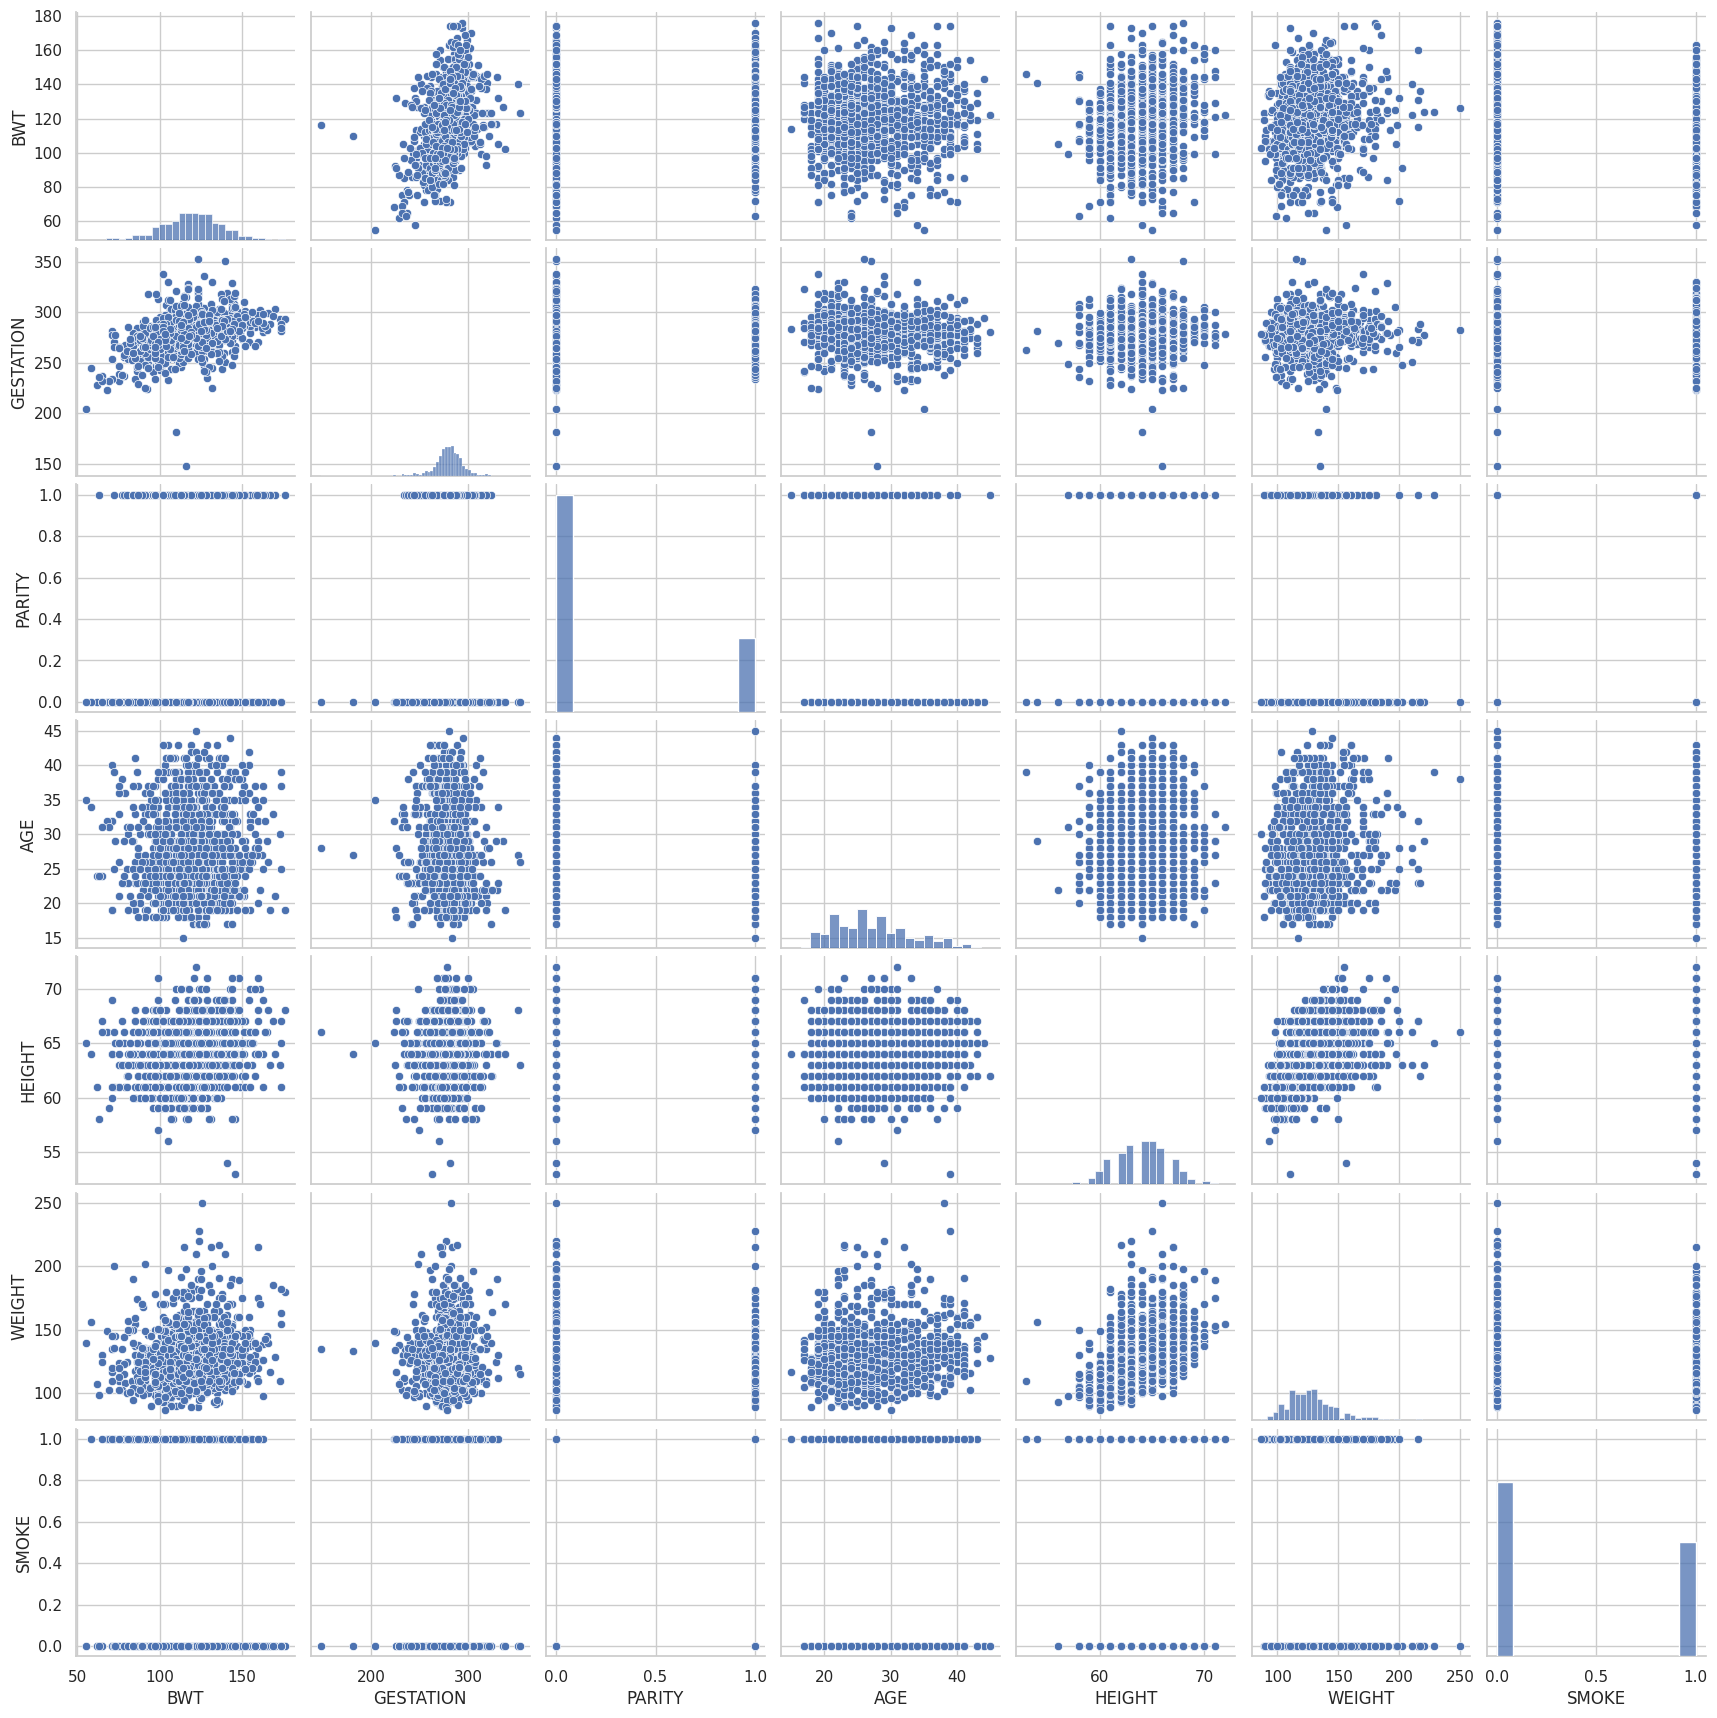

In [105]:
sns.pairplot(dd_df1)

**Explanation:**

The code line sns.pairplot(dd_df1) utilizes Seaborn's pairplot function to generate a matrix of scatterplots for numerical columns in the DataFrame dd_df1. Each scatterplot displays the relationship between two variables, while diagonal plots show the distribution of individual variables.


**Conclusion:**

The pairplot offers a comprehensive visual overview of the pairwise relationships and distributions among numerical variables in the DataFrame dd_df1. Scatterplots help identify potential patterns, correlations, or outliers, aiding in the exploration of the dataset's internal structures. The diagonal histograms provide insights into the univariate distribution of each variable. This visualization serves as a valuable exploratory tool for understanding the interplay between different features in the dataset.







## **Conclusion**

The code provided demonstrate a step-by-step exploration and analysis of two distinct datasets: snowflake_data and json. The initial set of functions and queries on snowflake_data involve data inspection, description, and visualization. Descriptive statistics, such as mean and median, were computed to capture the central tendencies of the data, providing a preliminary understanding of the dataset's characteristics. Subsequent visualizations, including bar charts and line plots, allowed for the exploration of relationships and patterns, such as the distribution of sexual intercourse ages and the correlation between age and the number of STD diagnoses.

The analysis then shifted to the json dataset, starting with the importation of data from a JSON file. Similar exploration techniques were applied, including data type conversion and calculation of descriptive statistics. Visualizations such as bar plots and pie charts were employed to gain insights into the temporal distribution of data and mortality rates across various demographic factors, including race and ethnicity.

Additionally, the code snippets showcased the application of a custom function to convert specific columns to numeric types, ensuring data consistency and readiness for quantitative analysis. The visualizations, accompanied by appropriate titles and comments, enhanced the interpretability of the results.

In summary, these code snippets exemplify a thorough exploration and analysis process, encompassing data inspection, type conversion, descriptive statistics calculation, and diverse visualizations. These steps collectively contribute to a comprehensive understanding of the datasets' characteristics and lay the groundwork for more in-depth analyses or targeted investigations into specific aspects of the data.